In [2]:
import xarray as xr
import sys, os
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Local Imports
curdir = os.getcwd()
#print(curdir)
sys.path.insert(0, curdir+"/../data_processing")
from ceres_ebaf import *

sys.path.insert(0, curdir+"/../visualization")
from ceres_ebaf_plotting import *

plt.rcParams['figure.figsize'] = [10, 3.5]

In [11]:
file_name = "/Users/mawa7160/dev/data/CERES/EBAF/CERES_EBAF-TOA_Full_2022_01.nc"
ceres_ds = xr.open_dataset(file_name)
ceres_full_years = ceres_ds
solar_full_data = ceres_full_years["solar_mon"]

def show_and_tell(data_set, title="NH-SH-Global"):
    plot_hemisphere_and_global_by_year(data_set, data_set.year, fixed_ylim=True, title=title)
    nh_error = mean_squared_error(data_set["nh"], data_set["sh"])
    print("Mean Squared error from NH to SH: "+str(nh_error))
    print("NH Total Avg: "+str(np.average(data_set["nh"]))+" W m^-2")
    print("Global Total Avg: "+str(np.average(data_set["global"]))+" W m^-2")
    print("Abs Total Difference: "+str(np.abs(np.average(data_set["nh"])- np.average(data_set["global"])))+" W m^-2")

Averaging without days of the month
Mean Squared error from NH to SH: 0.42308308744364287
NH Total Avg: 339.69596438903255 W m^-2
Global Total Avg: 340.01298738079646 W m^-2
Abs Total Difference: 0.31702299176390625 W m^-2


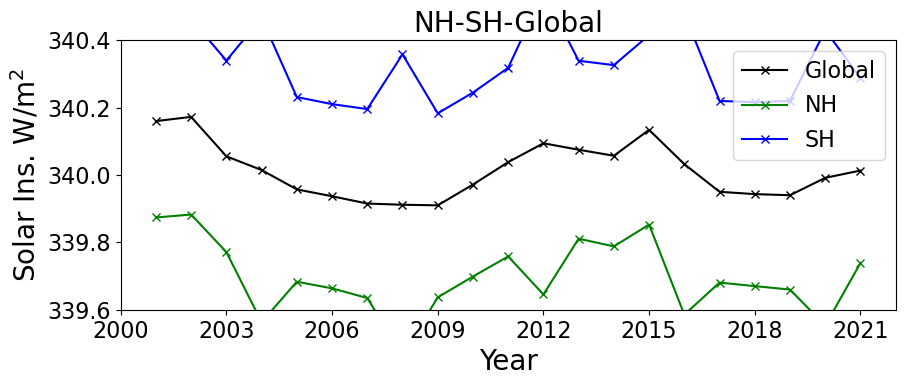

In [12]:
bad_time_avg = create_hemisphere_data(solar_full_data, start_yr="2001", start_mon="01", 
                end_yr="2022", end_mon="01", time_weighting=-1, space_weighting=1)
print("Averaging without days of the month")
show_and_tell(bad_time_avg)

Averaging with days of the month
Mean Squared error from NH to SH: 0.10504512205392456
NH Total Avg: 339.97638822588 W m^-2
Global Total Avg: 339.97496867143866 W m^-2
Abs Total Difference: 0.001419554441326909 W m^-2


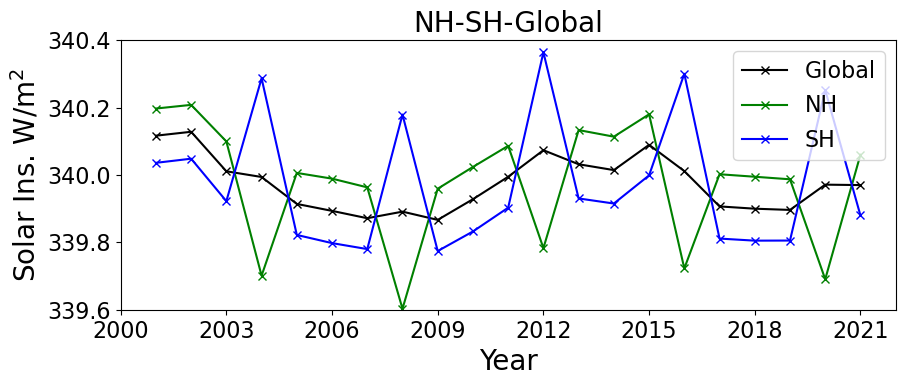

In [13]:
ok_time_avg = create_hemisphere_data(solar_full_data, start_yr="2001", start_mon="01", 
                end_yr="2022", end_mon="01", time_weighting=0, space_weighting=1)
print("Averaging with days of the month")
show_and_tell(ok_time_avg)

Averaging Empirical Best
Mean Squared error from NH to SH: 0.00016385926672212809
NH Total Avg: 339.97217243669775 W m^-2
Global Total Avg: 339.9754746173757 W m^-2
Abs Total Difference: 0.0033021806779629514 W m^-2


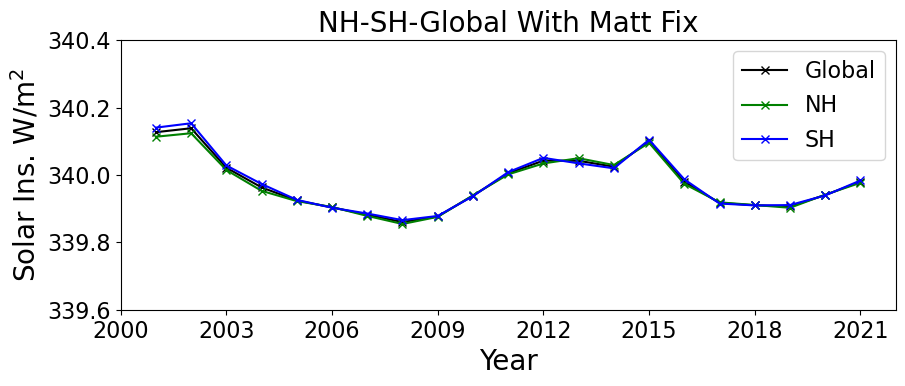

In [16]:
best_time_avg = create_hemisphere_data(solar_full_data, start_yr="2001", start_mon="01", 
                end_yr="2022", end_mon="01", time_weighting=1, space_weighting=1)
print("Averaging Empirical Best")
show_and_tell(best_time_avg,  title="NH-SH-Global With Matt Fix")

Averaging with Jake fix
Mean Squared error from NH to SH: 0.0004903519101997005
NH Total Avg: 339.97245795851677 W m^-2
Global Total Avg: 339.9753269865838 W m^-2
Abs Total Difference: 0.0028690280670389257 W m^-2


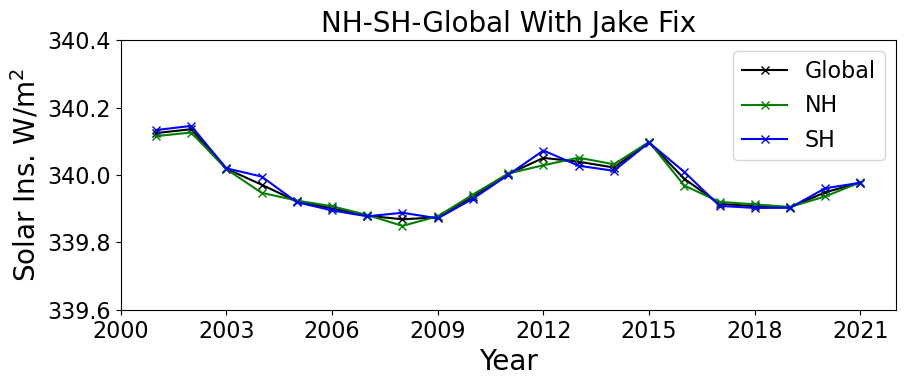

In [15]:
good_time_avg = create_hemisphere_data(solar_full_data, start_yr="2001", start_mon="01", 
                end_yr="2022", end_mon="01", time_weighting=2, space_weighting=1)
print("Averaging with Jake fix")
show_and_tell(good_time_avg, title="NH-SH-Global With Jake Fix")

In [8]:
bad = [np.average(bad_time_avg["global"]), np.abs(np.average(bad_time_avg["nh"])-np.average(bad_time_avg["global"]))]
ok = [np.average(ok_time_avg["global"]), np.abs(np.average(ok_time_avg["nh"])-np.average(ok_time_avg["global"]))]
good = [np.average(good_time_avg["global"]), np.abs(np.average(good_time_avg["nh"])-np.average(good_time_avg["global"]))]
best = [np.average(best_time_avg["global"]), np.abs(np.average(best_time_avg["nh"])-np.average(best_time_avg["global"]))]